In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df = pd.read_csv('clean_v1.csv')
df.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,548,TA,TA,Y,0,61,0,WD,Normal,208500
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,460,TA,TA,Y,298,0,0,WD,Normal,181500
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,608,TA,TA,Y,0,42,0,WD,Normal,223500
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,642,TA,TA,Y,0,35,0,WD,Abnorml,140000
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,836,TA,TA,Y,192,84,0,WD,Normal,250000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1460

## Categorical Variable EDA

In [29]:
cat_to_include = []
cat_to_exclude = []

### 1. MSZoning

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

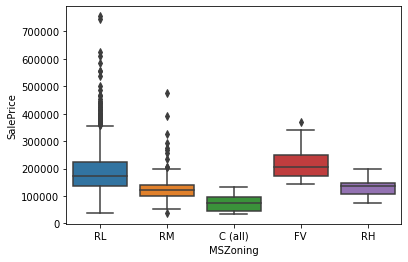

In [16]:
sns.boxplot(data = df, x = 'MSZoning', y= 'SalePrice')

In [22]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [30]:
cat_to_exclude.append('MSZoning')

##### This shows the 'MSZoning' column is highly skewed in 'RL' value. So, it is not good to include it as feature for modelling

# 

### 2. Street

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

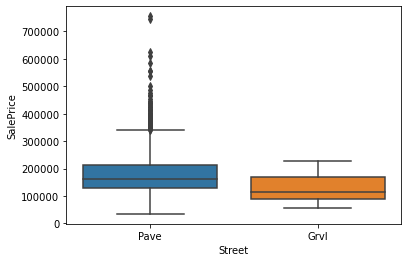

In [23]:
sns.boxplot(data = df, x = 'Street', y= 'SalePrice')

In [26]:
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [31]:
cat_to_exclude.append('Street')

##### This shows the 'Street' is highly skewed in 'Pave' value. So, it is not good to include it as feature for modelling

# 

### 3. LotShape

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

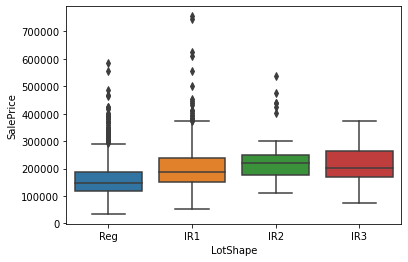

In [27]:
sns.boxplot(data = df, x = 'LotShape', y= 'SalePrice')

In [28]:
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

<AxesSubplot:xlabel='LotShape', ylabel='Count'>

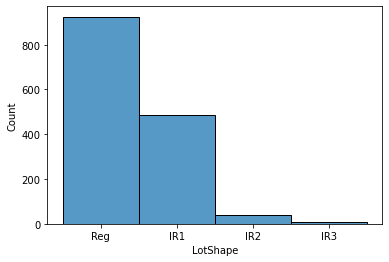

In [44]:
sns.histplot(df, x = 'LotShape')

In [45]:
cat_to_include.append('LotShape')

##### It is considered as a feature

### 4. LandContour

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

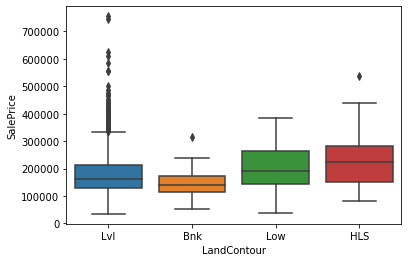

In [33]:
sns.boxplot(data = df, x ='LandContour', y= 'SalePrice')

In [34]:
df['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [35]:
cat_to_exclude.append('LandContour')

##### This column 'LandContour' is highly skewed in 'Lvl'. So, this column is excluded

 #    

### 5. Utilities

In [37]:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

<AxesSubplot:xlabel='Utilities', ylabel='Count'>

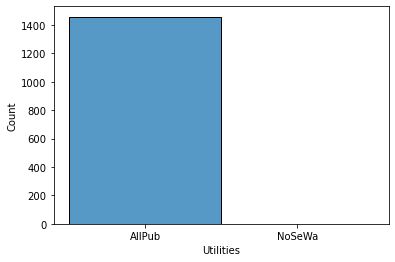

In [40]:
sns.histplot(data = df, x = 'Utilities')

In [41]:
cat_to_exclude.append('Utilities')

##### 'Utilities' is highly on 'AllPub'

# 

### 6. LotConfig

In [42]:
df['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

<AxesSubplot:xlabel='LotConfig', ylabel='Count'>

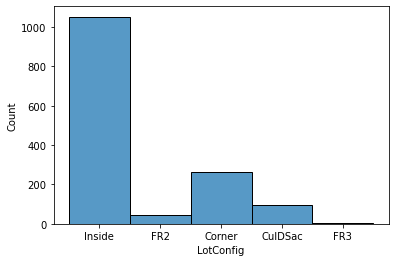

In [43]:
sns.histplot(df, x = 'LotConfig')

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

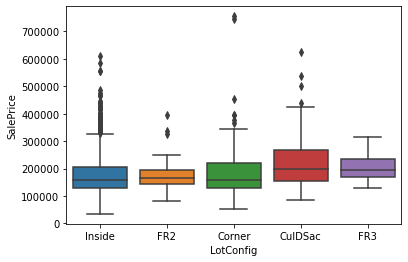

In [47]:
sns.boxplot(data = df, x = 'LotConfig', y = 'SalePrice')

In [48]:
cat_to_include.append('LotConfig')

##### It is included

# 

### 7. LandSlope

<AxesSubplot:xlabel='LandSlope', ylabel='Count'>

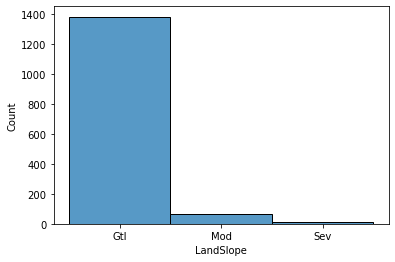

In [49]:
sns.histplot(data = df, x = 'LandSlope')

In [50]:
df['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

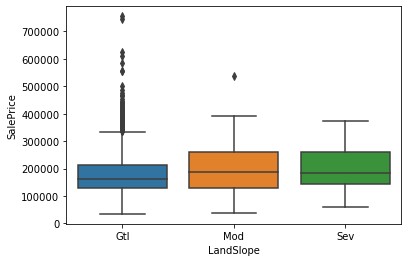

In [51]:
sns.boxplot(data = df, x = 'LandSlope', y = 'SalePrice')

In [52]:
cat_to_exclude.append('LandSlope')

##### 'LandSlope' is highly fall under 'Gtl' value. So, it's excluded

# 

### 8. Neighborhood

<AxesSubplot:xlabel='Neighborhood', ylabel='Count'>

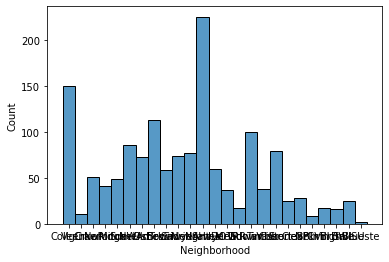

In [53]:
sns.histplot(data = df, x = 'Neighborhood')

In [54]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [55]:
cat_to_include.append('Neighborhood')

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

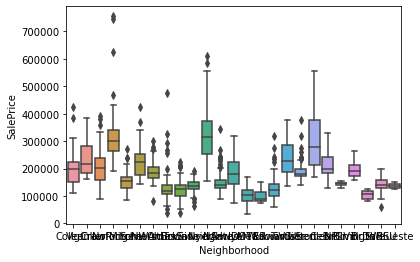

In [56]:
sns.boxplot(data = df, x = 'Neighborhood', y = 'SalePrice')

##### 'Neighborhood' is included

# 

### 9. Condition1

In [57]:
df['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

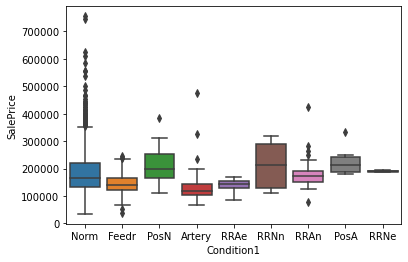

In [58]:
sns.boxplot(data = df, x = 'Condition1', y = 'SalePrice')

In [60]:
cat_to_exclude.append('Condition1')

##### 'Condition1' lies more under 'Norm'. SO, excluded

# 

### 10. Condition2

In [59]:
df['Condition2'].value_counts()

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

In [61]:
cat_to_exclude.append('Condition2')

##### 'Condition2' lies more under 'Norm'. SO, excluded

# 

### 11. BldgType

In [62]:
df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

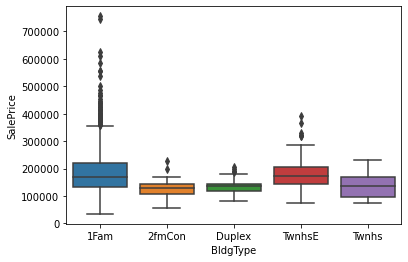

In [63]:
sns.boxplot(data = df, x = 'BldgType', y = 'SalePrice')

In [64]:
cat_to_exclude.append('BldgType')

##### 'BldgType' is excluded

# 

### 12. HouseStyle

<AxesSubplot:xlabel='HouseStyle', ylabel='Count'>

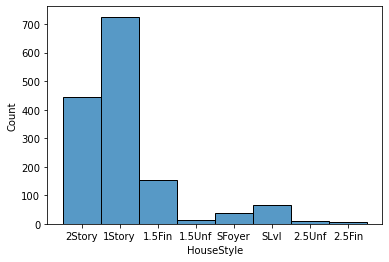

In [65]:
sns.histplot(df, x = 'HouseStyle')

In [66]:
df['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

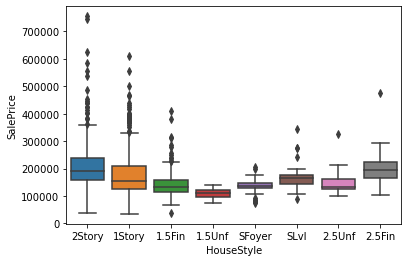

In [67]:
sns.boxplot(data =df, x = 'HouseStyle', y = 'SalePrice')

In [68]:
cat_to_include.append('HouseStyle')

##### 'HouseStyle' is included

# 

### 13. RoofStyle

<AxesSubplot:xlabel='RoofStyle', ylabel='Count'>

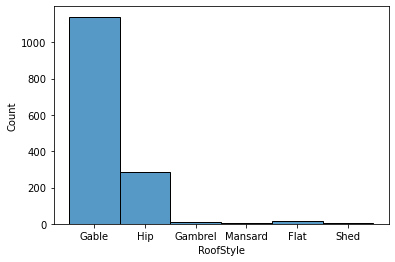

In [69]:
sns.histplot(df, x = 'RoofStyle')

In [70]:
df['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

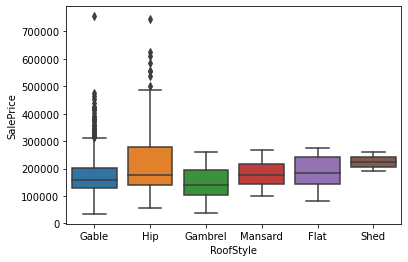

In [71]:
sns.boxplot(data = df, x = 'RoofStyle', y = 'SalePrice')

In [72]:
cat_to_exclude.append('RoofStyle')

##### 'RoofStyle' is excluded as it seems insignificant in modelling

# 

### 14. RoofMatl

In [73]:
df['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

In [74]:
cat_to_exclude.append('RoofMatl')

##### 'RoofMatl' is excluded as it highly falls under 'CompShg'

# 

### 15. Exterior1st

In [75]:
df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

<AxesSubplot:xlabel='Exterior1st', ylabel='Count'>

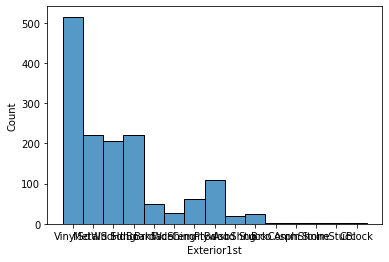

In [76]:
sns.histplot(df, x = 'Exterior1st')

<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

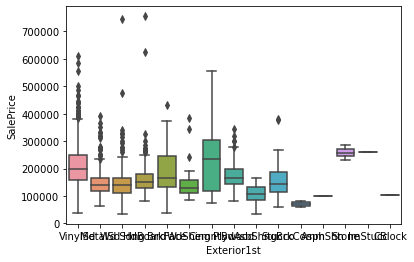

In [77]:
sns.boxplot(data = df, x= 'Exterior1st', y = 'SalePrice')

In [78]:
cat_to_include.append('Exterior1st')

##### 'Exterior1st' is included

# 

### 16. Exterior2nd

In [79]:
df['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

<AxesSubplot:xlabel='Exterior2nd', ylabel='SalePrice'>

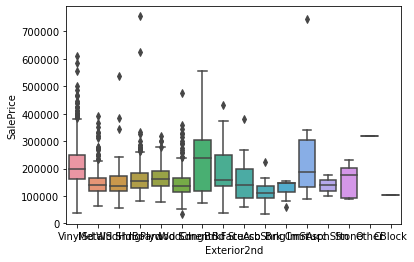

In [80]:
sns.boxplot(data = df, x= 'Exterior2nd', y = 'SalePrice')

In [81]:
cat_to_include.append('Exterior2nd')

##### 'Exterior2nd' is included.

# 

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1460

### 17. MasVnrType

<AxesSubplot:xlabel='MasVnrType', ylabel='Count'>

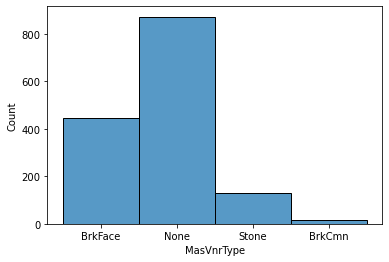

In [84]:
sns.histplot(df, x = 'MasVnrType')

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

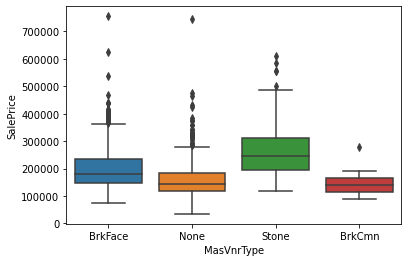

In [86]:
sns.boxplot(data = df, x = 'MasVnrType', y = 'SalePrice')

In [87]:
cat_to_include.append('MasVnrType')

##### 'MasVnrType' is included as the values are distributed

# 

### 18. ExterQual

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

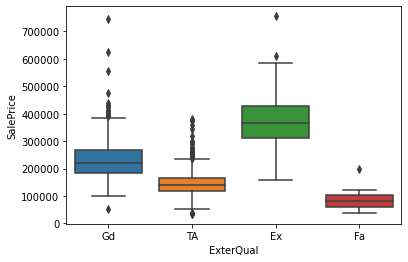

In [88]:
sns.boxplot(data = df, x = 'ExterQual', y = 'SalePrice')

In [89]:
df['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [90]:
cat_to_include.append('ExterQual')

##### 'ExterQual' is included

# 

### 19. ExterCond

<AxesSubplot:xlabel='ExterCond', ylabel='Count'>

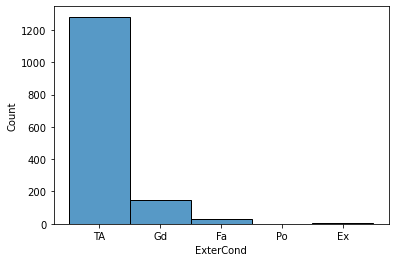

In [91]:
sns.histplot(df, x = 'ExterCond')

In [93]:
df['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [94]:
cat_to_exclude.append('ExterCond')

##### 'ExterCond' is excluded

# 

### 20. Foundation

<AxesSubplot:xlabel='Foundation', ylabel='Count'>

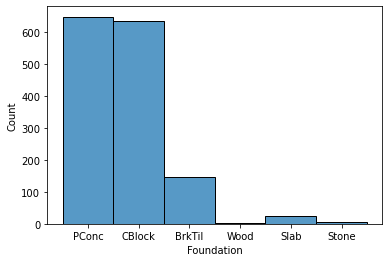

In [95]:
sns.histplot(df, x ='Foundation')

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

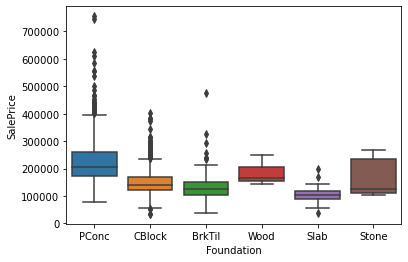

In [96]:
sns.boxplot(data = df, x = 'Foundation', y = 'SalePrice')

In [97]:
cat_to_exclude.append('Foundation')

# 

### 21. BsmtQual

In [98]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

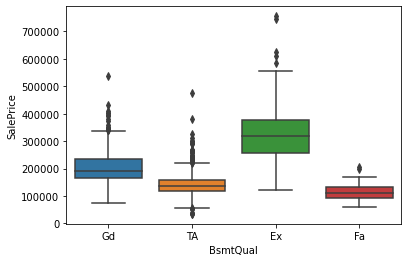

In [99]:
sns.boxplot(data = df, x = 'BsmtQual', y = 'SalePrice')

In [100]:
cat_to_include.append('BsmtQual')

##### 'BsmtQual' best categorical variable till now for modelling

# 

### 22. BsmtCond

In [104]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [107]:
cat_to_exclude.append('BsmtCond')

##### 'BsmtCond' is excluded

# 

### 23. BsmtExposure

In [108]:
df['BsmtExposure']. value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [109]:
cat_to_include.append('BsmtExposure')

##### 'BsmtExposure' is included
# 

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1460

# 24. BsmtFinType1

In [110]:
df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

<AxesSubplot:xlabel='BsmtFinType1', ylabel='SalePrice'>

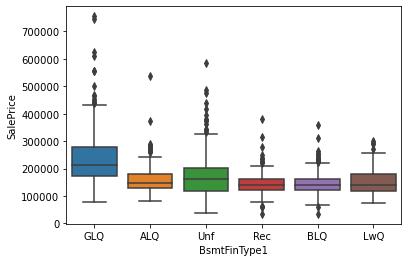

In [113]:
sns.boxplot(data = df, x = 'BsmtFinType1', y = 'SalePrice')

In [114]:
cat_to_include.append('BsmtFinType1')

##### 'BsmtFinType1' is included
# 

### 25. BsmtFinType2

In [115]:
df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [116]:
cat_to_exclude.append('BsmtFinType2')

##### 'BsmtFinType2' is excluded
# 

### 26. Heating

In [118]:
df['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

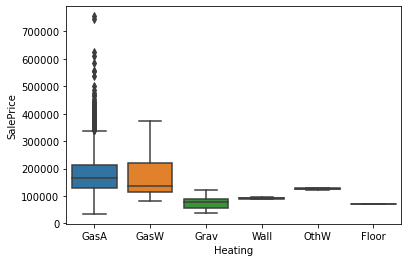

In [119]:
sns.boxplot(data =df, x ='Heating', y = 'SalePrice')

In [120]:
cat_to_exclude.append('Heating')

##### 'Heating' is excluded as almost all are 'GasA'
# 

### 27. HeatingQC

In [121]:
df['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

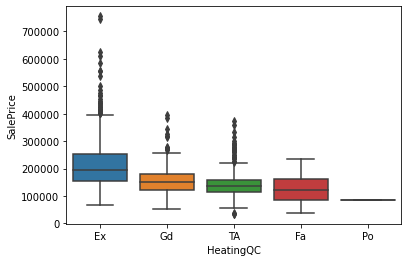

In [122]:
sns.boxplot(data =df, x = 'HeatingQC', y = 'SalePrice')

In [123]:
cat_to_include.append('HeatingQC')
len(cat_to_include)

12

In [124]:
len(cat_to_exclude)

15

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1460

### 28. Central Air

In [127]:
df['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [128]:
cat_to_exclude.append('CentralAir')

### 29. Electrical

In [129]:
df['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

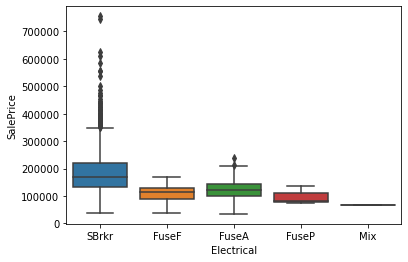

In [130]:
sns.boxplot(data = df, x ='Electrical', y ='SalePrice')

In [131]:
cat_to_exclude.append('Electrical')

##### 'Electrical' is excluded
# 

### 30. KitchenQual 

In [132]:
df['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

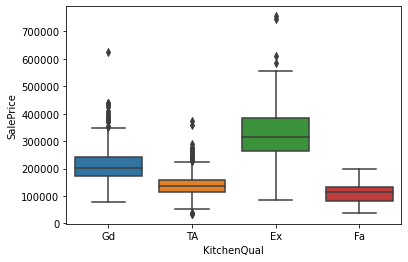

In [133]:
sns.boxplot(data = df, x = 'KitchenQual', y = 'SalePrice')

In [134]:
cat_to_include.append('KitchenQual')

##### 'KitchenQual' is included
# 

### 31. Functional

In [135]:
df['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

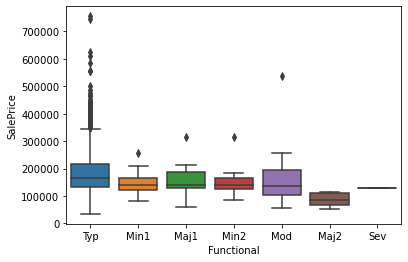

In [136]:
sns.boxplot(data = df, x = 'Functional', y ='SalePrice')

In [137]:
cat_to_exclude.append('Functional')

##### 'Functional'  is excluded
# 

### 32. GarageType

In [138]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

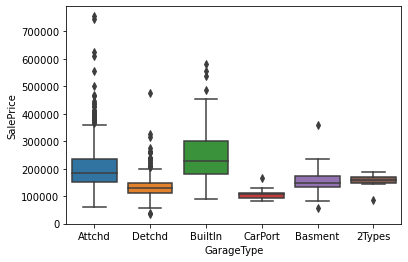

In [139]:
sns.boxplot(data =df, x ='GarageType', y = 'SalePrice')

In [140]:
cat_to_include.append('GarageType')

##### 'GarageType' is included
# 

### 33. GarageFinish

In [141]:
df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

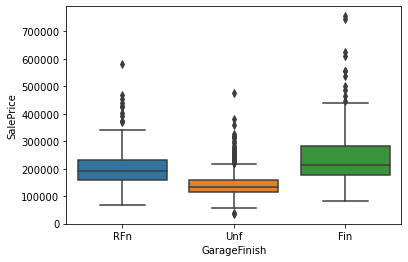

In [144]:
sns.boxplot(data = df, x = 'GarageFinish', y ='SalePrice')

In [145]:
cat_to_include.append('GarageFinish')

##### 'GarageFinish' is included
# 

### 34. GarageQual

In [146]:
df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

<AxesSubplot:xlabel='GarageQual', ylabel='SalePrice'>

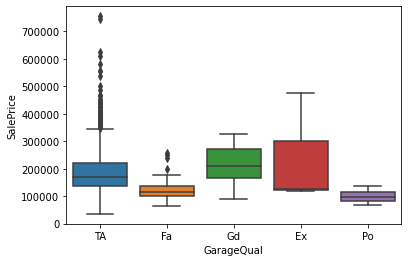

In [147]:
sns.boxplot(data =df, x ='GarageQual', y = 'SalePrice')

In [148]:
cat_to_exclude.append('GarageQual')

##### 'GarageQual' is excluded as its value is skewed under 'TA'
# 

### 35. GarageCond

In [149]:
df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [150]:
cat_to_exclude.append('GarageCond')

##### 'GarageCond' is excluded
# 

### 36. PavedDrive

In [151]:
df['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [152]:
cat_to_exclude.append('PavedDrive')

### 37. SaleType

In [153]:
df['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [154]:
cat_to_exclude.append('SaleType')

##### 'SaleType' is excluded
# 

### 38. SaleCondition

In [156]:
df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

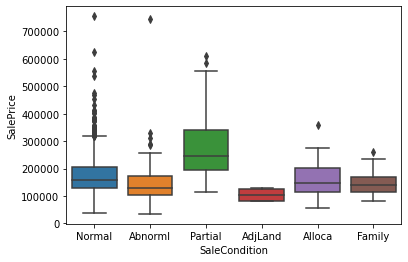

In [157]:
sns.boxplot(data = df, x = 'SaleCondition', y ='SalePrice')

In [158]:
cat_to_exclude.append('SaleCondition')

##### 'SaleCondition'  is excluded
# 

In [159]:
cat_to_exclude

['MSZoning',
 'Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofStyle',
 'RoofMatl',
 'ExterCond',
 'Foundation',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [160]:
len(cat_to_exclude)

23

In [162]:
len(cat_to_include)

15

In [163]:
df.drop(cat_to_exclude, inplace = True, axis = 1)

In [164]:
df.shape

(1460, 40)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 40 columns):
LotFrontage     1201 non-null float64
LotArea         1460 non-null int64
LotShape        1460 non-null object
LotConfig       1460 non-null object
Neighborhood    1460 non-null object
HouseStyle      1460 non-null object
OverallQual     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
Exterior1st     1460 non-null object
Exterior2nd     1460 non-null object
MasVnrType      1460 non-null object
MasVnrArea      1460 non-null float64
ExterQual       1460 non-null object
BsmtQual        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinSF1      1460 non-null int64
BsmtUnfSF       1460 non-null int64
TotalBsmtSF     1460 non-null int64
HeatingQC       1460 non-null object
1stFlrSF        1460 non-null int64
2ndFlrSF        1460 non-null int64
GrLivArea       1460 non-null int64
BsmtFullBath 

In [166]:
df.head()

,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,...,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,SalePrice
0,65.0,8450,Reg,Inside,CollgCr,2Story,7,2003,2003,VinylSd,...,0,Attchd,2003.0,RFn,2,548,0,61,0,208500
1,80.0,9600,Reg,FR2,Veenker,1Story,6,1976,1976,MetalSd,...,1,Attchd,1976.0,RFn,2,460,298,0,0,181500
2,68.0,11250,IR1,Inside,CollgCr,2Story,7,2001,2002,VinylSd,...,1,Attchd,2001.0,RFn,2,608,0,42,0,223500
3,60.0,9550,IR1,Corner,Crawfor,2Story,7,1915,1970,Wd Sdng,...,1,Detchd,1998.0,Unf,3,642,0,35,0,140000
4,84.0,14260,IR1,FR2,NoRidge,2Story,8,2000,2000,VinylSd,...,1,Attchd,2000.0,RFn,3,836,192,84,0,250000


In [168]:
df.to_csv('clean_v2.csv', index = False)